# Our app aids healthcare professionals in helping women undergoing the IVF process to select the best embryo for transfer. 

# Loading Required Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Reading 
import os
from imutils import paths

# Data Processing
import numpy as np
import cv2
import random

# Data Analysis
import matplotlib.pyplot as plt

# Data Modeling & Model Evaluation
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Reading the data

In [2]:
imagepaths=sorted(list(paths.list_images('embryo-dataset')))

In [3]:
image=cv2.imread(imagepaths[100])

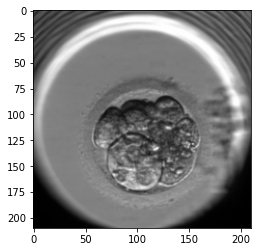

In [4]:
plt.imshow(image)

In [5]:
image.shape

(210, 210, 3)

In [6]:
random.shuffle(imagepaths)

In [7]:
len(imagepaths)

2440

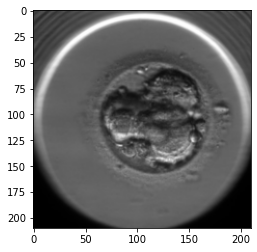

In [8]:
image=cv2.imread(imagepaths[100])
plt.imshow(image)

# Data Modeling

In [9]:
def preprocessing(imagepathlist):
    
    x=[]
    y=[]
    
    for i in range(len(imagepathlist)):
        image=cv2.imread(imagepathlist[i])
        
        #Resizing the Image to have 256/256 pixels in the width and height direction
        image=cv2.resize(image,(256,256))
        
        # Normalizing the image
        image=image/255.0
        
        x.append(image)
        label=imagepathlist[i].split('\\')[3]
        y.append(label)
    return(x,y)

In [10]:
x,y=preprocessing(imagepaths)

In [11]:
# labels
y

['5',
 '3',
 '5',
 '2',
 '4',
 '2',
 '4',
 '5',
 '5',
 '2',
 '2',
 '1',
 '2',
 '3',
 '1',
 '3',
 '4',
 '5',
 '5',
 '1',
 '4',
 '5',
 '2',
 '4',
 '5',
 '3',
 '4',
 '1',
 '5',
 '4',
 '4',
 '1',
 '5',
 '4',
 '5',
 '3',
 '4',
 '4',
 '5',
 '1',
 '3',
 '2',
 '2',
 '1',
 '5',
 '3',
 '4',
 '4',
 '1',
 '2',
 '5',
 '4',
 '1',
 '5',
 '1',
 '5',
 '4',
 '3',
 '1',
 '2',
 '3',
 '2',
 '3',
 '3',
 '1',
 '5',
 '5',
 '3',
 '5',
 '2',
 '5',
 '2',
 '3',
 '3',
 '4',
 '5',
 '4',
 '1',
 '4',
 '5',
 '3',
 '5',
 '4',
 '1',
 '3',
 '4',
 '2',
 '4',
 '1',
 '4',
 '4',
 '5',
 '5',
 '1',
 '5',
 '5',
 '4',
 '3',
 '3',
 '2',
 '1',
 '5',
 '2',
 '5',
 '5',
 '4',
 '5',
 '4',
 '5',
 '4',
 '1',
 '2',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '3',
 '2',
 '4',
 '5',
 '1',
 '1',
 '4',
 '4',
 '3',
 '4',
 '1',
 '2',
 '2',
 '3',
 '5',
 '5',
 '5',
 '5',
 '2',
 '1',
 '2',
 '3',
 '5',
 '3',
 '1',
 '5',
 '4',
 '2',
 '3',
 '4',
 '5',
 '1',
 '5',
 '3',
 '1',
 '5',
 '1',
 '5',
 '2',
 '5',
 '1',
 '5',
 '5',
 '1',
 '3',
 '5',
 '3',
 '5',
 '1'

In [12]:
x_train,x_test,y_train,y_test=train_test_split(np.array(x),np.array(y),test_size=0.3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [13]:
print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1366, 256, 256, 3) (732, 256, 256, 3) (342, 256, 256, 3) (1366,) (732,) (342,)


In [14]:
y_train[0]

'2'

In [15]:
lb=LabelBinarizer()

y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [16]:
y_train[0]

array([0, 1, 0, 0, 0])

In [17]:
#training split
len(x_train)

1366

In [18]:
#testing split
len(x_test)

732

In [19]:
# valuation split
len(x_val)

342

# CNN Model

In [20]:
num_classes = 5

model=Sequential()

# First Convolutional Block

model.add(Conv2D(16,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Second Convolutional Block

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Third Convolutional Block

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))


#Flatten: flatten layer converts convolutional layer into a single one-dimentonal vector

model.add(Flatten())

#Dense Layer: offers learned features from all combinational features of the previous layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(num_classes,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [22]:
callback=EarlyStopping(monitor='accuracy',patience=3)
model.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,epochs=50,batch_size=50,shuffle=True,callbacks=[callback])

Epoch 1/50
28/28 [==============================] - 114s 4s/step - loss: 2.1998 - accuracy: 0.2460
Epoch 2/50
28/28 [==============================] - 100s 4s/step - loss: 1.5846 - accuracy: 0.2818
Epoch 3/50
28/28 [==============================] - 82s 3s/step - loss: 1.5840 - accuracy: 0.2899
Epoch 4/50
28/28 [==============================] - 82s 3s/step - loss: 1.5606 - accuracy: 0.3053
Epoch 5/50
28/28 [==============================] - 84s 3s/step - loss: 1.5302 - accuracy: 0.3199
Epoch 6/50
28/28 [==============================] - 92s 3s/step - loss: 1.5262 - accuracy: 0.3236
Epoch 7/50
28/28 [==============================] - 79s 3s/step - loss: 1.5318 - accuracy: 0.3331
Epoch 8/50
28/28 [==============================] - 76s 3s/step - loss: 1.4994 - accuracy: 0.3433
Epoch 9/50
28/28 [==============================] - 76s 3s/step - loss: 1.4260 - accuracy: 0.3865
Epoch 10/50
28/28 [==============================] - 71s 3s/step - loss: 1.4235 - accuracy: 0.3829
Epoch 11/50
28/28

# Saving Model

In [24]:
# h5 is a serialization format
model.save('final_embryo_model.h5')

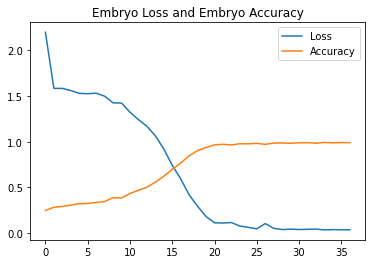

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend({'Loss':0,'Accuracy':1})
plt.title("Embryo Loss and Embryo Accuracy")
plt.savefig('Embryo-Accuracy-Loss.png')

In [26]:
# predict the first 4 images in the test set
prediction = model.predict(x_test[:4])
prediction

1/1 [==============================] - 0s 206ms/step


array([[3.4275722e-02, 1.6406095e-02, 2.9760730e-01, 5.8551872e-01,
        6.6192172e-02],
       [1.6231021e-01, 4.8509869e-01, 2.9650837e-01, 4.7575131e-02,
        8.5075581e-03],
       [1.6140478e-04, 5.6367701e-01, 4.3602762e-01, 1.3089132e-04,
        3.1010097e-06],
       [4.6441056e-11, 2.3870098e-10, 4.0905430e-08, 9.9496388e-01,
        5.0361282e-03]], dtype=float32)

In [28]:
y_test[:4]

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

# Checking the Model

In [29]:
classes = [1, 2, 3, 4, 5]

def embryo_predict(imgfilepath):
    IMG_SIZE = 256
    img_array = cv2.imread(imgfilepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE) )
    # Normalizing the image
    image=new_array/255.0
    prediction = model.predict([image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)])
    MaxPosition=np.argmax(prediction)  
    prediction_label=classes[MaxPosition]
    
    if prediction_label == 1:
        return "This Embryo is at the 'Degenerate' Embryo stage. Embryo failed to develop."
    elif prediction_label == 2:
        return "This Embryo is at the 'Morula' stage. More than 50% of the embryo has undergone compaction."
    elif prediction_label == 3:
        return "This Embryo is at the 'Early Blastocyst' stage. Balstocoele less than the volume of the embryo."
    elif prediction_label == 4:
        return "This Embryo is at the 'Full Blastocyst' stage. Blastocoele completely filling embryo."
    elif prediction_label == 5:
        return "This Embryo is at the 'Hatched Blastocyst' stage. Blastocysts completely hatched."

In [30]:
embryo_predict('stage1-0.png')

1/1 [==============================] - 0s 135ms/step


"This Embryo is at the 'Degenerate' Embryo stage. Embryo failed to develop."

In [31]:
embryo_predict('stage2-8.png')

1/1 [==============================] - 0s 44ms/step


"This Embryo is at the 'Morula' stage. More than 50% of the embryo has undergone compaction."

In [34]:
embryo_predict('stage5-12.png')

1/1 [==============================] - 0s 39ms/step


"This Embryo is at the 'Hatched Blastocyst' stage. Blastocysts completely hatched."

In [35]:
embryo_predict('5-hatched-google.png')

1/1 [==============================] - 0s 43ms/step


"This Embryo is at the 'Hatched Blastocyst' stage. Blastocysts completely hatched."